In [1]:
import warnings
warnings.filterwarnings('ignore')

# for utilities
import re
import time
import pandas as pd
import numpy as np

# for nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

#for plotting 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



from collections import Counter
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vikas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/vikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vikas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Import the dataset 
dataset = pd.read_csv('sentiment140.csv',header = None,encoding='latin')
dataset.head()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [3]:
#Changing the columns name
dataset.columns = ["sentiment", "ids", "date", "flag", "user", "text"]
dataset.head()

sentiment         ids                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
#checking the numbers of Rows & Columns 
dataset.shape

(1600000, 6)

In [5]:
#As i am doing the sentimental analysis, only text is required
dataset = dataset[['text']]

In [6]:
#Create a new instance of a language specific subclass.
stemmer=SnowballStemmer('english')

In [7]:
#defining the dictionaries for emojis and symbols:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ';-)': 'wink', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-0': 'yell', 'O.o': 'confused',
          ":'-)": 'sadsmile', ';)': 'wink', 
          'O:-)': 'angel','(:-D': 'gossip'}

symbols = { '$': 'dollar', '%': 'percent', '₹': 'rupee', '€': 'euro', ',000,000': 'm', ',000': 'k', 
           'im': 'i am', 'ur': 'you are', 'ive': 'i have', 'idk': 'i do not know'
           }

In [8]:
def preprocess_tweet(tweets):
    wordLemm = WordNetLemmatizer()
    
    urlSyntax        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userSyntax       = '@[^\s]+'
    alphaSyntax      = "[^a-zA-Z0-9]"
    sequenceSyntax   = r"(.)\1\1+"
    sequenceReplaceSyntax = r"\1\1"
    
    textProcessed = []
    for tweet in tweets:
        #Case-lowering the text
        tweet = tweet.lower()
        
        # Replacing URls with 'URL'
        tweet = re.sub(urlSyntax,'',tweet)
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, 'EMOJI' + emojis[emoji])   
            
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userSyntax,'', tweet)   
        
        #Replace all Symbols
        for symbol in symbols.keys():
            tweet = tweet.replace(symbol, '' + symbols[symbol]) 
            
        # Replace all non alphabets.
        tweet = re.sub(alphaSyntax, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequenceSyntax, sequenceReplaceSyntax, tweet)
        
        # Lemmatizing the word.
        tweet = wordLemm.lemmatize(tweet)
        
        textProcessed.append(tweet)   
         
    return textProcessed

In [9]:
#Removing the StopWords.
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [10]:
t = time.time()
#processeddata = preprocess_tweet(dataset.text)
dataset['filtered_text'] = preprocess_tweet(dataset.text)
dataset['removed_stopwords_text'] = dataset['filtered_text'].apply(lambda text : remove_stopwords(text))
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 79 seconds


In [11]:
#new_dataset is used for the textblob
new_dataset = dataset[['text','removed_stopwords_text']]

In [12]:
#VADER lexcion
sid = SentimentIntensityAnalyzer()

In [13]:
#determing the label of each tweet.
dataset['scores'] = dataset['removed_stopwords_text'].apply(lambda text:sid.polarity_scores(text))
dataset['compound'] = dataset['scores'].apply(lambda d:d['compound'])
dataset['sentiment'] = dataset['compound'].apply(lambda score: 'positive' if score>0 
                                              else 'negative' )#('negative' if score <0  else 'neutral'))

negative    808640
positive    791360
Name: sentiment, dtype: int64


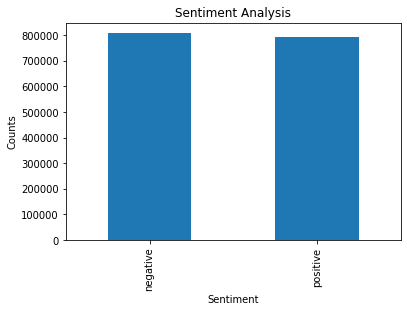

In [14]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
print(dataset['sentiment'].value_counts())
dataset['sentiment'].value_counts().plot(kind = 'bar')
plt.show()


In [15]:
#finding the negative tweets and positive tweets
negative_words=dataset['sentiment']=='positive'
positive_words=dataset['sentiment']=='negative'

dataset['Words'] = dataset['removed_stopwords_text'].apply(lambda x:str(x).split())

top_positive = Counter([word for text in dataset[positive_words]['Words'] for word in text])
top_positive_list=pd.DataFrame(top_positive.most_common(100),columns=['Words','Counts'])

top_negative = Counter([word for text in dataset[negative_words]['Words'] for word in text])
top_negative_list=pd.DataFrame(top_negative.most_common(100),columns=['Words','Counts'])


In [16]:
#top_negative
#sort_orders = sorted(top_negative.items(), key=lambda x: x[1], reverse=True)

In [17]:
#sort_orders

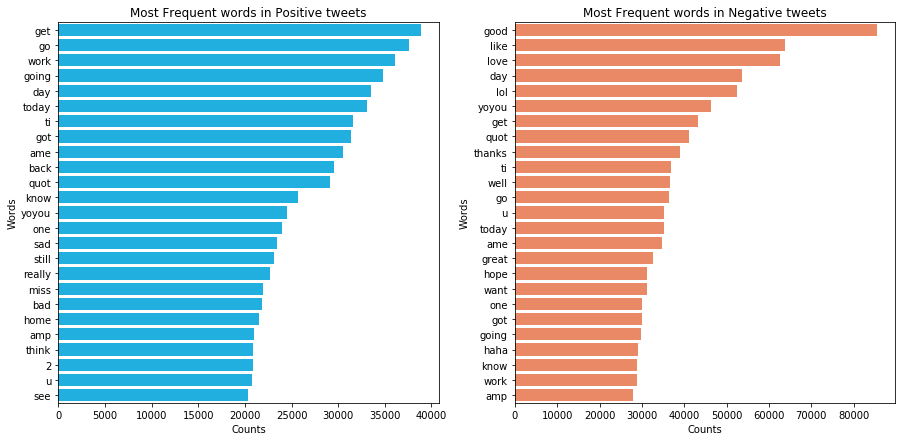

In [18]:
#Barplot for top 25 positive and negative words in the positive and negative tweets
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7))

sns.barplot(y='Words',x='Counts',data=top_positive_list[:25],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_negative_list[:25],color='coral',ax=ax[1])

ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")

plt.show()

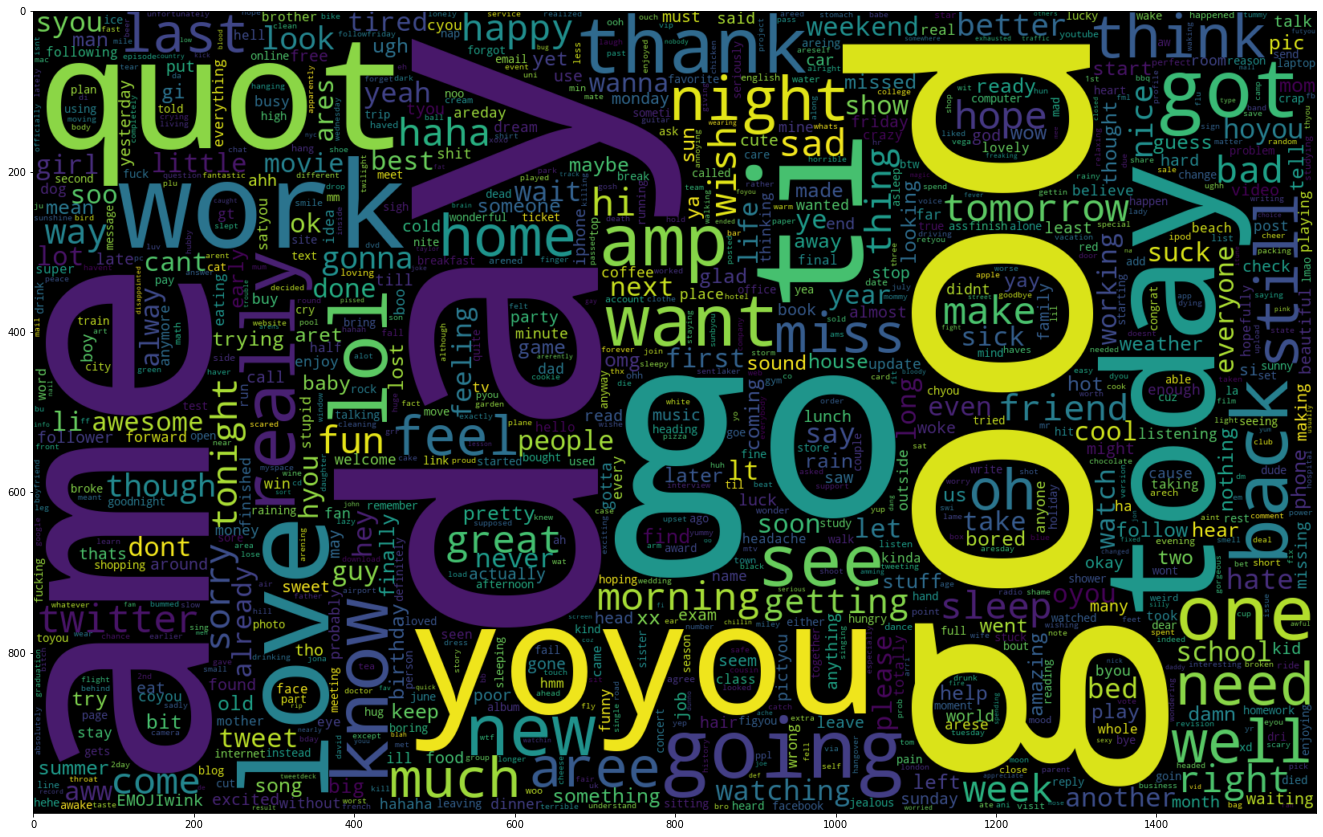

In [19]:
# word cloud visualization
allWords = ' '.join([teewts for teewts in dataset['removed_stopwords_text']])
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 1000,collocations=False).generate(allWords)
plt.figure(figsize = (23,23))
plt.imshow(wordCloud, interpolation="bilinear")
plt.show()

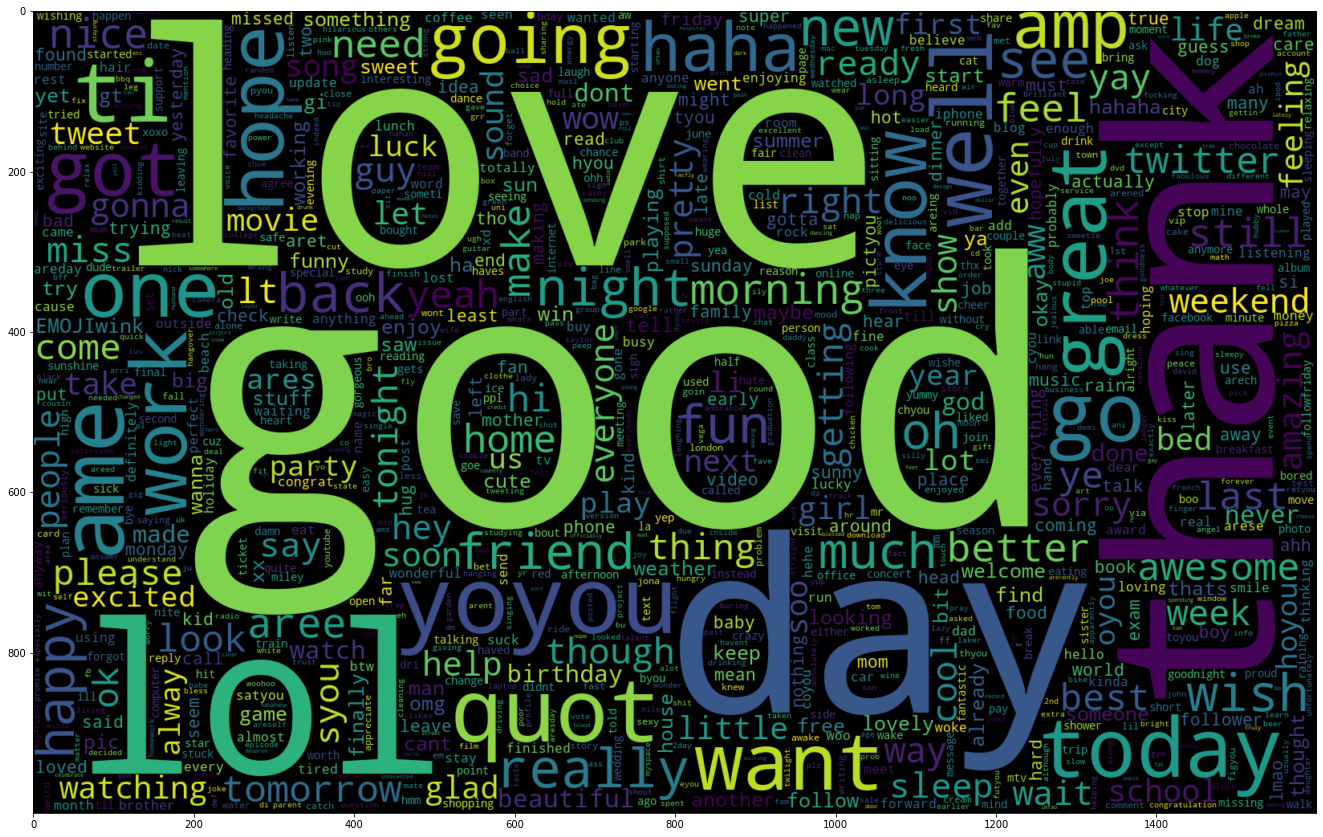

In [20]:
# word cloud visualization for most frequent word in the positive tweets
allWords = ' '.join([teewts for teewts in dataset['removed_stopwords_text'][dataset['sentiment'] == 'positive']])
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 1000,collocations=False).generate(allWords)

plt.figure(figsize = (23,23))
plt.imshow(wordCloud, interpolation="bilinear")
plt.show()

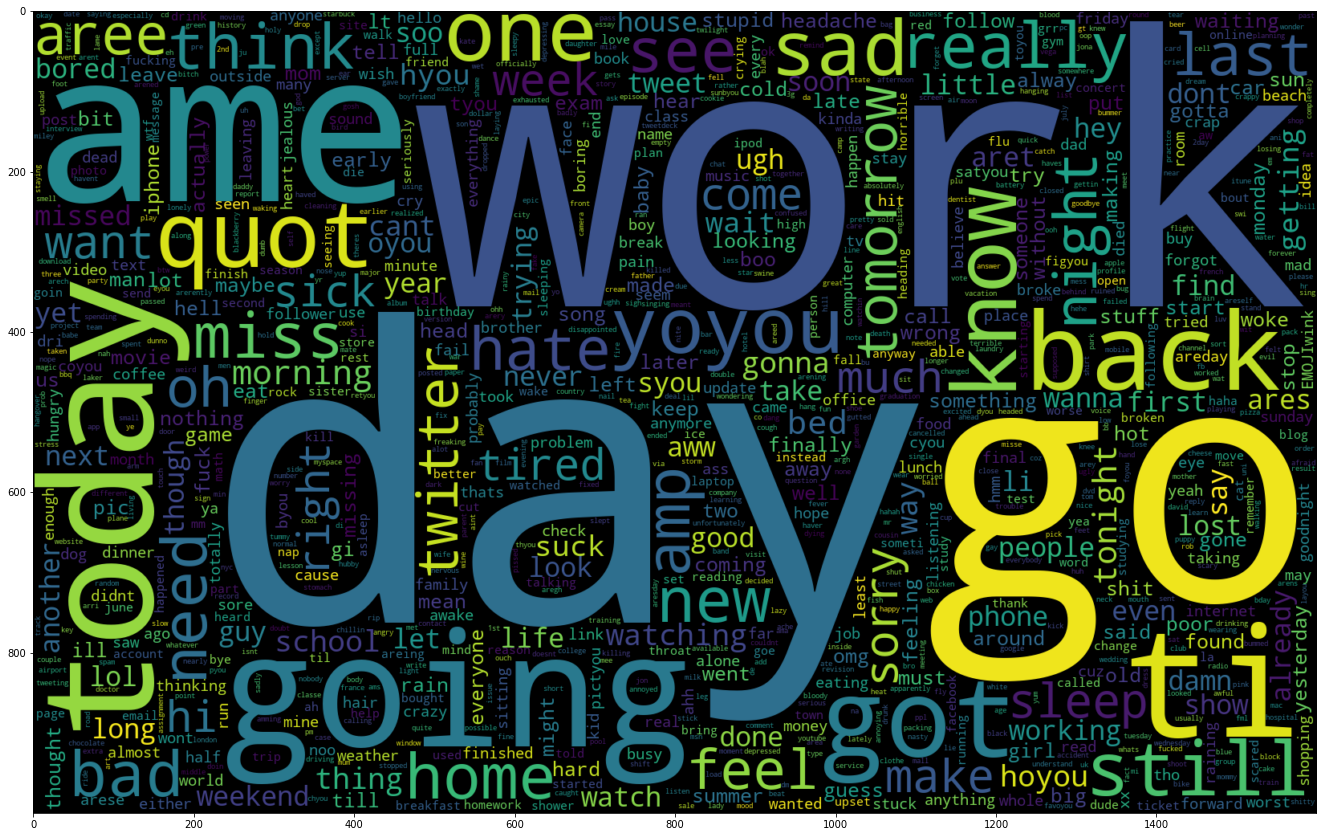

In [21]:
# word cloud visualization for most frequent word in the negative tweets
allWords = ' '.join([teewts for teewts in dataset['removed_stopwords_text'][dataset['sentiment'] == 'negative']])
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 1000,collocations=False).generate(allWords)

plt.figure(figsize = (23,23))
plt.imshow(wordCloud, interpolation="bilinear")
plt.show()

In [22]:
#Emotions detection using the NRClex
import nltk
from nrclex import NRCLex

In [23]:
dataset['removed_stopwords_text'] = dataset['removed_stopwords_text'].str.strip()

In [24]:
#function for convert the owrd of text field and return dataframe of emotions effects in tweets
def emotions_tweet(text):
    text = str([cell.encode('utf-8') for cell in text])# to convert the text into utf-8 unicode
    text_str = NRCLex(text) 
    text_str = text_str.raw_emotion_scores
    text_str = pd.DataFrame(text_str,index=[0])
    text_str = pd.melt(text_str)
    text_str.columns = ('Emotions','Count')
    text_str = text_str.sort_values('Count')
    return text_str

In [25]:
emotions_dataset = emotions_tweet(dataset['removed_stopwords_text'])

In [26]:
#Emotions counts in complete dataset
emotions_dataset = emotions_tweet(dataset['removed_stopwords_text'])

#Emotions counts in the positive dataset
positive_tweet = dataset[dataset['sentiment'].str.contains('positive',na = False)]['removed_stopwords_text']
emotions_positive = emotions_tweet(positive_tweet)

#Emotions counts in the negative dataset
negative_tweet= dataset[dataset['sentiment'].str.contains('negative',na = False)]['removed_stopwords_text']
emotions_negative = emotions_tweet(negative_tweet)

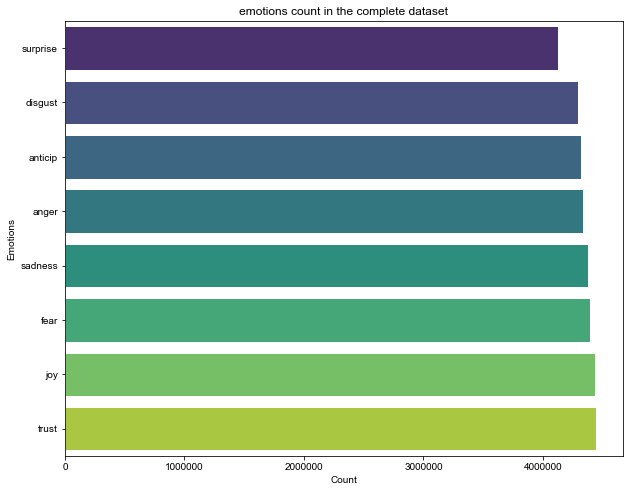

In [27]:
#Plotting the emotions in the whole dataset
plt.figure(figsize=(10,8))
plt.title('emotions count in the complete dataset')
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data=emotions_dataset[0:8],palette='viridis');

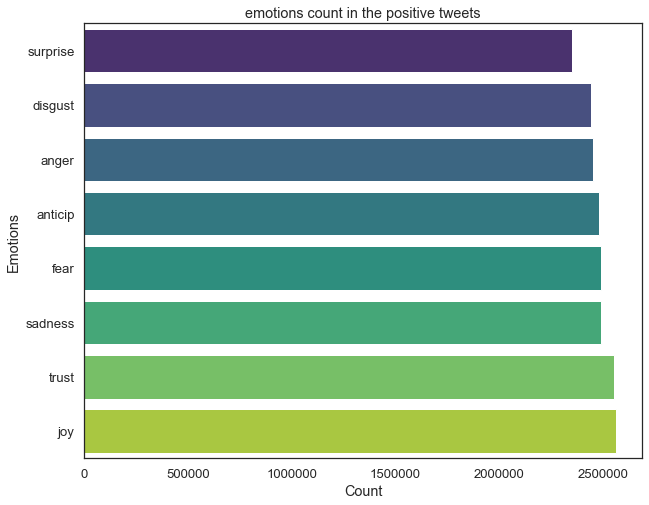

In [28]:
#Plotting the emotions in positive tweets
plt.figure(figsize=(10,8))
plt.title('emotions count in the positive tweets')
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data=emotions_positive[0:8],palette='viridis');

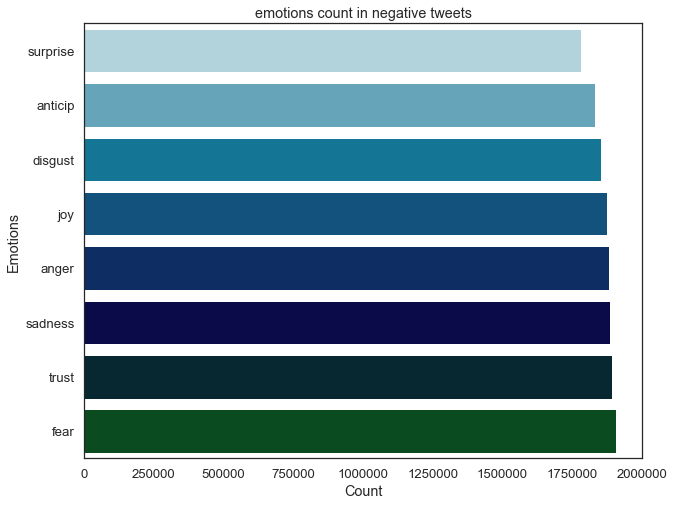

In [29]:
#Plotting the emotions in negative tweets
plt.figure(figsize=(10,8))
plt.title('emotions count in negative tweets')
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data=emotions_negative[0:8],palette='ocean_r');

In [30]:

from textblob import TextBlob

In [31]:
#Creating a function for the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Creating a function for the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.subjectivity

#Adding subjectivity and polarity into dataset by adding 2 new columns
new_dataset['Subjectivity'] = new_dataset['removed_stopwords_text'].apply(getSubjectivity)
new_dataset['Polarity'] = new_dataset['removed_stopwords_text'].apply(getPolarity)

In [32]:
#New dataset is:
new_dataset

text  \
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1        is upset that he can't update his Facebook by ...   
2        @Kenichan I dived many times for the ball. Man...   
3          my whole body feels itchy and like its on fire    
4        @nationwideclass no, it's not behaving at all....   
5                            @Kwesidei not the whole crew    
6                                              Need a hug    
7        @LOLTrish hey  long time no see! Yes.. Rains a...   
8                     @Tatiana_K nope they didn't have it    
9                                @twittera que me muera ?    
10             spring break in plain city... it's snowing    
11                              I just re-pierced my ears    
12       @caregiving I couldn't bear to watch it.  And ...   
13       @octolinz16 It it counts, idk why I did either...   
14       @smarrison i would've been the first, but i di...   
15       @iamjazzyfizzle I wish I got to watch it with ...   
16       Hollis' death scene will hurt me severely to w...   
17                                    about to file taxes    
18       @LettyA ahh ive always wanted to see rent  lov...   
19       @FakerPattyPattz Oh dear. Were you drinking ou...   
20       @alydesigns i was out most of the day so didn'...   
21       one of my friend called me, and asked to meet ...   
22        @angry_barista I baked you a cake but I ated it    
23                  this week is not going as i had hoped    
24                              blagh class at 8 tomorrow    
25          I hate when I have to call and wake people up    
26       Just going to cry myself to sleep after watchi...   
27                                  im sad now  Miss.Lilly   
28       ooooh.... LOL  that leslie.... and ok I won't ...   
29       Meh... Almost Lover is the exception... this t...   
...                                                    ...   
1599970  Thanks @eastwestchic &amp; @wangyip Thanks! Th...   
1599971  @marttn thanks Martin. not the most imaginativ...   
1599972          @MikeJonesPhoto Congrats Mike  Way to go!   
1599973  http://twitpic.com/7jp4n - OMG! Office Space.....   
1599974  @yrclndstnlvr ahaha nooo you were just away fr...   
1599975  @BizCoachDeb  Hey, I'm baack! And, thanks so m...   
1599976  @mattycus Yeah, my conscience would be clear i...   
1599977  @MayorDorisWolfe Thats my girl - dishing out t...   
1599978                          @shebbs123 i second that    
1599979                                     In the garden    
1599980  @myheartandmind jo jen by nemuselo zrovna tÃ© ...   
1599981  Another Commenting Contest! [;: Yay!!!  http:/...   
1599982  @thrillmesoon i figured out how to see my twee...   
1599983  @oxhot theri tomorrow, drinking coffee, talkin...   
1599984  You heard it here first -- We're having a girl...   
1599985  if ur the lead singer in a band, beware fallin...   
1599986              @tarayqueen too much ads on my blog.    
1599987  @La_r_a NEVEER  I think that you both will get...   
1599988  @Roy_Everitt ha- good job. that's right - we g...   
1599989                 @Ms_Hip_Hop im glad ur doing well    
1599990                              WOOOOO! Xbox is back    
1599991  @rmedina @LaTati Mmmm  That sounds absolutely ...   
1599992                  ReCoVeRiNg FrOm ThE lOnG wEeKeNd    
1599993                                  @SCOOBY_GRITBOYS    
1599994  @Cliff_Forster Yeah, that does work better tha...   
1599995  Just woke up. Having no school is the best fee...   
1599996  TheWDB.com - Very cool to hear old Walt interv...   
1599997  Are you ready for your MoJo Makeover? Ask me f...   
1599998  Happy 38th Birthday to my boo of alll time!!! ...   
1599999  happy #charitytuesday @theNSPCC @SparksCharity...   

                                    removed_stopwords_text  Subjectivity  \
0        aww bummer shoulda got david carr third day EM...      0.450000   
1        upset update facebook texting might cry result..

In [33]:
#Creating a function to compute the negative and positive analysis.
def getAnalysis(score):
    if score <= 0:
        return 'Negative'
    else: 
        return 'Positive'
    
    
new_dataset['sentiment'] = new_dataset['Polarity'].apply(getAnalysis)

In [34]:
new_dataset

text  \
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1        is upset that he can't update his Facebook by ...   
2        @Kenichan I dived many times for the ball. Man...   
3          my whole body feels itchy and like its on fire    
4        @nationwideclass no, it's not behaving at all....   
5                            @Kwesidei not the whole crew    
6                                              Need a hug    
7        @LOLTrish hey  long time no see! Yes.. Rains a...   
8                     @Tatiana_K nope they didn't have it    
9                                @twittera que me muera ?    
10             spring break in plain city... it's snowing    
11                              I just re-pierced my ears    
12       @caregiving I couldn't bear to watch it.  And ...   
13       @octolinz16 It it counts, idk why I did either...   
14       @smarrison i would've been the first, but i di...   
15       @iamjazzyfizzle I wish I got to watch it with ...   
16       Hollis' death scene will hurt me severely to w...   
17                                    about to file taxes    
18       @LettyA ahh ive always wanted to see rent  lov...   
19       @FakerPattyPattz Oh dear. Were you drinking ou...   
20       @alydesigns i was out most of the day so didn'...   
21       one of my friend called me, and asked to meet ...   
22        @angry_barista I baked you a cake but I ated it    
23                  this week is not going as i had hoped    
24                              blagh class at 8 tomorrow    
25          I hate when I have to call and wake people up    
26       Just going to cry myself to sleep after watchi...   
27                                  im sad now  Miss.Lilly   
28       ooooh.... LOL  that leslie.... and ok I won't ...   
29       Meh... Almost Lover is the exception... this t...   
...                                                    ...   
1599970  Thanks @eastwestchic &amp; @wangyip Thanks! Th...   
1599971  @marttn thanks Martin. not the most imaginativ...   
1599972          @MikeJonesPhoto Congrats Mike  Way to go!   
1599973  http://twitpic.com/7jp4n - OMG! Office Space.....   
1599974  @yrclndstnlvr ahaha nooo you were just away fr...   
1599975  @BizCoachDeb  Hey, I'm baack! And, thanks so m...   
1599976  @mattycus Yeah, my conscience would be clear i...   
1599977  @MayorDorisWolfe Thats my girl - dishing out t...   
1599978                          @shebbs123 i second that    
1599979                                     In the garden    
1599980  @myheartandmind jo jen by nemuselo zrovna tÃ© ...   
1599981  Another Commenting Contest! [;: Yay!!!  http:/...   
1599982  @thrillmesoon i figured out how to see my twee...   
1599983  @oxhot theri tomorrow, drinking coffee, talkin...   
1599984  You heard it here first -- We're having a girl...   
1599985  if ur the lead singer in a band, beware fallin...   
1599986              @tarayqueen too much ads on my blog.    
1599987  @La_r_a NEVEER  I think that you both will get...   
1599988  @Roy_Everitt ha- good job. that's right - we g...   
1599989                 @Ms_Hip_Hop im glad ur doing well    
1599990                              WOOOOO! Xbox is back    
1599991  @rmedina @LaTati Mmmm  That sounds absolutely ...   
1599992                  ReCoVeRiNg FrOm ThE lOnG wEeKeNd    
1599993                                  @SCOOBY_GRITBOYS    
1599994  @Cliff_Forster Yeah, that does work better tha...   
1599995  Just woke up. Having no school is the best fee...   
1599996  TheWDB.com - Very cool to hear old Walt interv...   
1599997  Are you ready for your MoJo Makeover? Ask me f...   
1599998  Happy 38th Birthday to my boo of alll time!!! ...   
1599999  happy #charitytuesday @theNSPCC @SparksCharity...   

                                    removed_stopwords_text  Subjectivity  \
0        aww bummer shoulda got david carr third day EM...      0.450000   
1        upset update facebook texting might cry result..

Positive    1053974
Negative     546026
Name: sentiment, dtype: int64


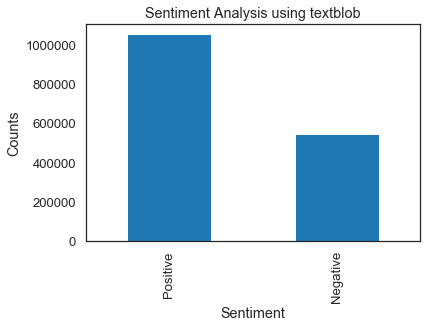

In [35]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis using textblob')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
print(new_dataset['sentiment'].value_counts())
new_dataset['sentiment'].value_counts().plot(kind = 'bar')
plt.show()



# Splitting the data 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset['removed_stopwords_text'], new_dataset['sentiment'],
                                                    test_size = 0.3, random_state = 0)
print('Splitted the dataset')

Splitted the dataset


# TF-IDF Vectoriser

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectorizer.fit(X_train)
print('Vectoriser done.')

#data transforming 
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
print('Data Transformed.')
print('count of feature words: ', len(vectorizer.get_feature_names()))

Vectoriser done.
Data Transformed.
count of feature words:  500000


# Evaluating model function

In [38]:
def models_run(model):
    
    # Predict Test dataset value
    y_pred = model.predict(X_test)

    # evaluation metrics for dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    confuse_matrix = confusion_matrix(y_test, y_pred)

    labels  = ['Negative','Positive']
    groups_labels = ['True Negative','False Positive', 'False Negative','True Positive']
    group_percentages = ['{0:.5%}'.format(value) for value in confuse_matrix.flatten() / np.sum(confuse_matrix)]

    new_labels = [f'{v1}\n{v2}' for v1, v2 in zip(groups_labels,group_percentages)]
    new_labels = np.asarray(new_labels).reshape(2,2)

    sns.heatmap(confuse_matrix, annot = new_labels,fmt = '', xticklabels = labels, yticklabels = labels)

    plt.xlabel("Predicted values ", fontdict = {'size':16}, labelpad = 10)
    plt.ylabel("Actual values "   , fontdict = {'size':16}, labelpad = 10)
    plt.title ("Confusion Matrix ", fontdict = {'size':20}, pad = 20)

# BernoulliNB Model

              precision    recall  f1-score   support

    Negative       0.99      0.94      0.97    164295
    Positive       0.97      1.00      0.98    315705

    accuracy                           0.98    480000
   macro avg       0.98      0.97      0.98    480000
weighted avg       0.98      0.98      0.98    480000



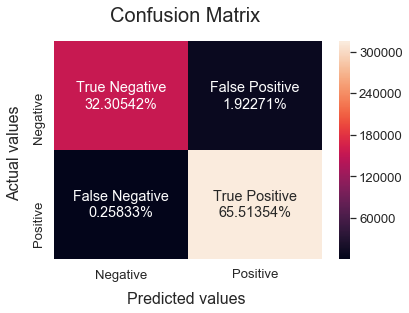

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

model_BNB = BernoulliNB(alpha = 2)
model_BNB.fit(X_train, y_train)
models_run(model_BNB)

# MultinomialNB Model

              precision    recall  f1-score   support

    Negative       1.00      0.26      0.41    164295
    Positive       0.72      1.00      0.84    315705

    accuracy                           0.75    480000
   macro avg       0.86      0.63      0.62    480000
weighted avg       0.82      0.75      0.69    480000



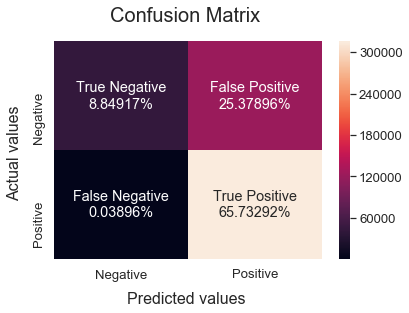

In [40]:
from sklearn.naive_bayes import MultinomialNB

model_multi = MultinomialNB(alpha = 2)
model_multi.fit(X_train, y_train)
models_run(model_multi)

# LinearSVC Model

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00    164295
    Positive       1.00      1.00      1.00    315705

    accuracy                           1.00    480000
   macro avg       1.00      1.00      1.00    480000
weighted avg       1.00      1.00      1.00    480000



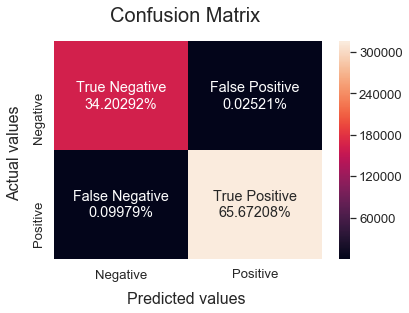

In [41]:
from sklearn.svm import LinearSVC

model_SVC = LinearSVC()
model_SVC.fit(X_train, y_train)
models_run(model_SVC)

# Logistic Regression

              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99    164295
    Positive       1.00      0.99      1.00    315705

    accuracy                           0.99    480000
   macro avg       0.99      1.00      0.99    480000
weighted avg       1.00      0.99      0.99    480000



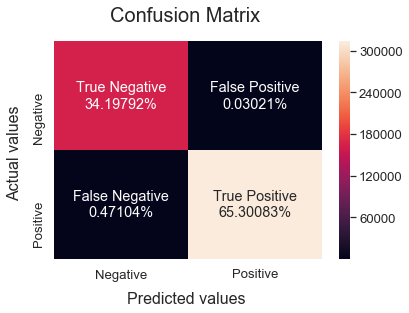

In [42]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
model_LR.fit(X_train, y_train)
models_run(model_LR)

# Models saving

In [43]:
import pickle

new_file = open('vectoriser.pickle','wb')
pickle.dump(vectorizer, new_file)
new_file.close()

new_file = open('model-LR.pickle','wb')
pickle.dump(model_LR, new_file)
new_file.close()

new_file = open('model-SVC.pickle','wb')
pickle.dump(model_SVC, new_file)
new_file.close()

new_file = open('model_BNB.pickle','wb')
pickle.dump(model_BNB, new_file)
new_file.close()

new_file = open('model_multi.pickle','wb')
pickle.dump(model_multi, new_file)
new_file.close()


# Model Using to Predict

In [44]:
def load_models():
    
    # vectoriser loaded.
    file = open('vectoriser.pickle', 'rb')
    vectorizer_model = pickle.load(file)
    file.close()
    
    #SVC model loaded
    file = open('model_SVC.pickle', 'rb')
    LinearSVC_model = pickle.load(file)
    file.close()
    
    #bnb model loaded 
    file = open('model_BNB.pickle', 'rb')
    BNB_model = pickle.load(file)
    file.close()
    
     #multi model loaded 
    file = open('model_multi.pickle', 'rb')
    multi_model = pickle.load(file)
    file.close()
    
    #LR model loaded 
    file = open('model_LR.pickle', 'rb')
    LR_model = pickle.load(file)
    file.close()
    
 
    return vectorizer_model, LinearSVC_model, BNB_model

# Creating predict function 

In [45]:
def predict(vectoriser, model, text):
    
    # Sentiment predication 
    textdata = vectoriser.transform(preprocess_tweet(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    
    return df

# Predicting for the input

In [46]:
text = ["I hate my boring job", "lost the not you", "I don't like rain!"]    
predict_result = predict(vectorizer, model_LR, text)
predict_result

text sentiment
0  I hate my boring job  Positive
1      lost the not you  Negative
2    I don't like rain!  Negative

In [47]:
text = ["I hate my boring job", "lost the not you", "I don't like rain!"]    
predict_result = predict(vectorizer, model_SVC, text)
predict_result

text sentiment
0  I hate my boring job  Positive
1      lost the not you  Negative
2    I don't like rain!  Negative

In [48]:
text = ["I hate my boring job", "lost the not you", "I don't like rain!"]    
predict_result = predict(vectorizer, model_BNB, text)
predict_result

text sentiment
0  I hate my boring job  Positive
1      lost the not you  Negative
2    I don't like rain!  Negative

In [49]:
text = ["I hate my boring job", "lost the not you", "I don't like rain!"]    
predict_result = predict(vectorizer, model_LR, text)
predict_result

text sentiment
0  I hate my boring job  Positive
1      lost the not you  Negative
2    I don't like rain!  Negative